# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from library.sb_utils import save_file

In [2]:
data = pd.read_csv('../data/clean_data.csv')

In [3]:
data.head(3)

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0


In [4]:
data = data.set_index('EmployeeNumber')

First thing is to check out the distributions of all the data

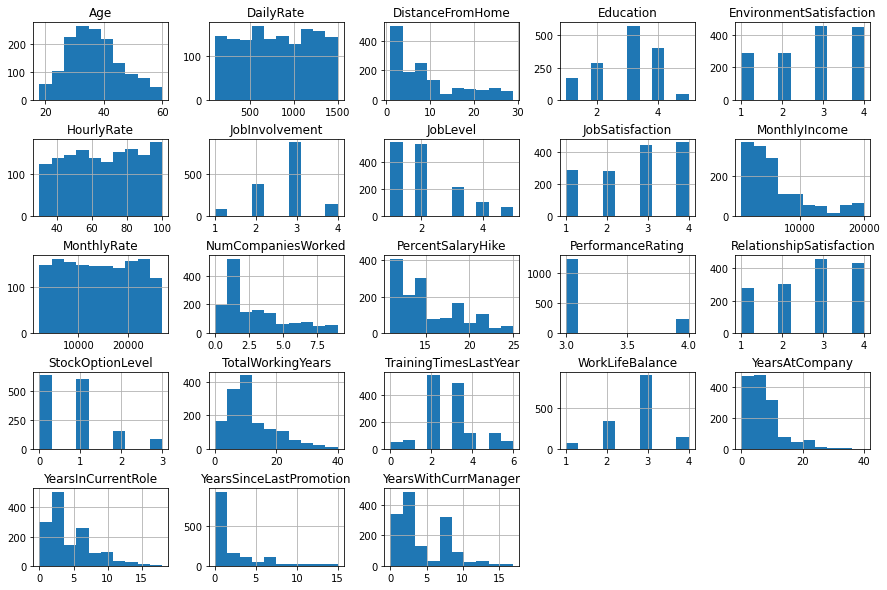

In [5]:
data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

There are a few clear patterns in the distributions. `Age` is normal. `DailyRate`, `HourlyRate` and `MonthlyRate` seem to to mostly uniform. `DistanceFromHome`, `NumCompaniesWorked`, `PercentSalaryHike`, `TotalWorkingYears`, `YearsAtCompany`, and `YearsInCurrentRole` all seem to be skewed right.

It may be useful to checkout the feature distribution for when attrition is equal to 1 to see if the distributions change at all.

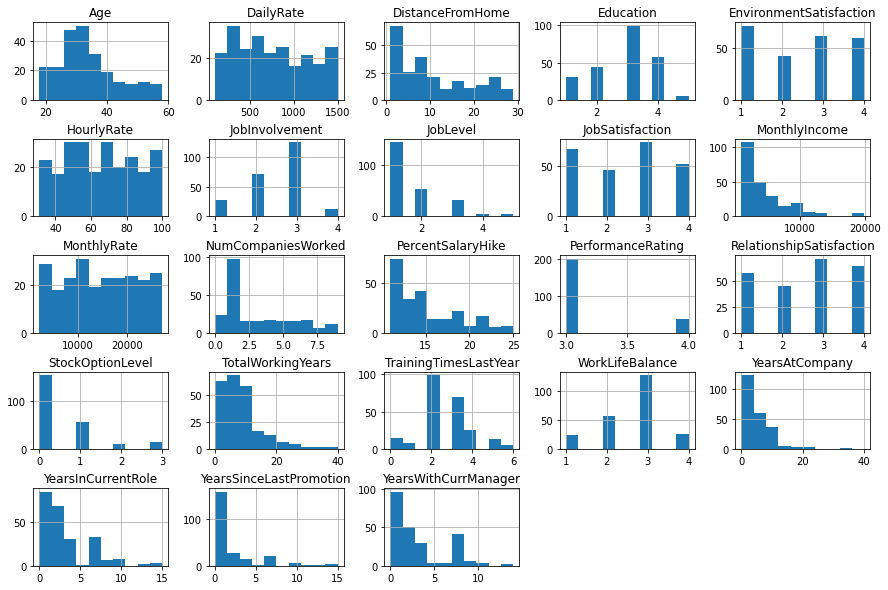

In [6]:
data[data['Attrition']=='Yes'].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

The distributions are still pretty similar to before. There are some minor changes to the distribution in `JobSatisfaction` and `StockOptionLevel`.

There are a few uniform-ish distributions such as `DailyRate`, `HourlyRate` and `MonthlyRate`. This may be a sign to drop these features since they may have no impact on `Attrition`.

A correlation matrix seems useful here to check out what features are most/least correlated with one another.

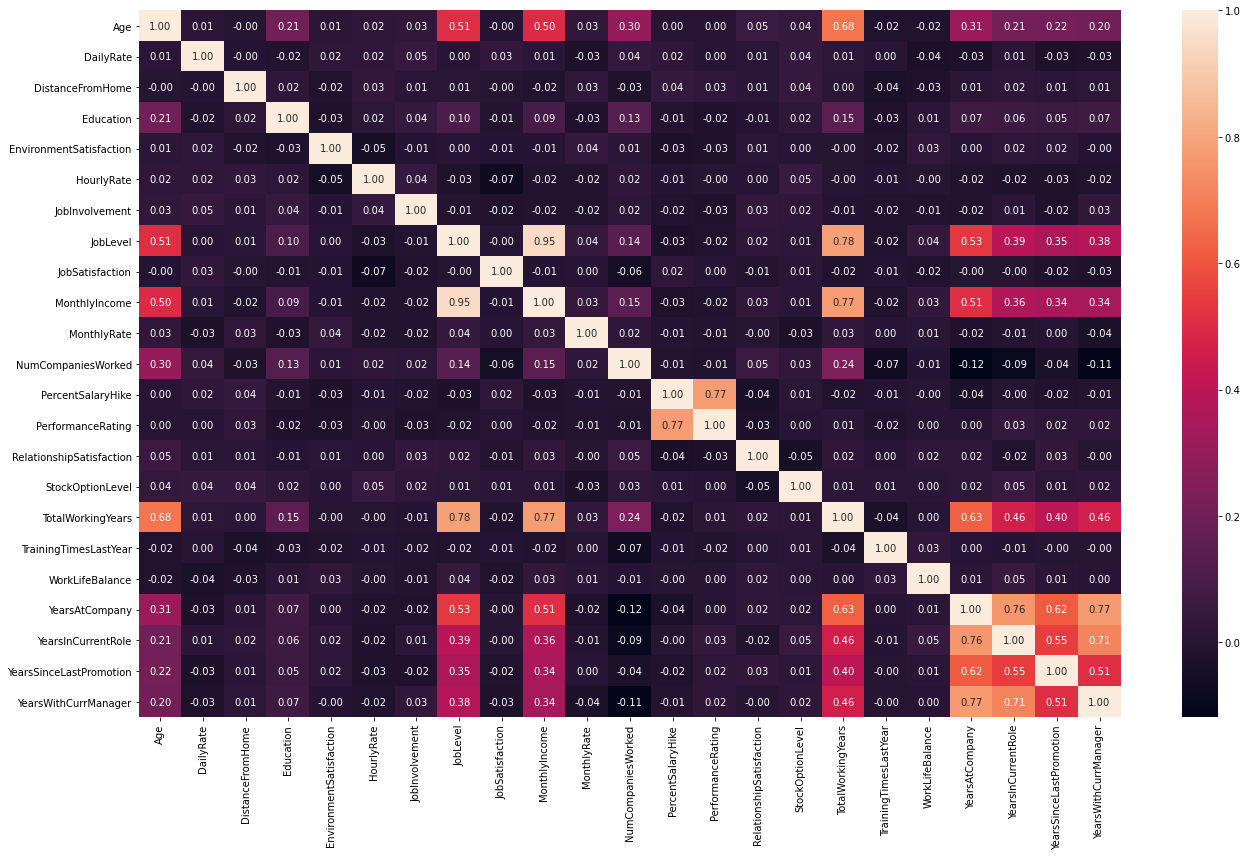

In [7]:
plt.subplots(figsize=(22, 13))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

There also seems to be one section of the map that has highly correlated features. Unsuprisingly, these are all the features that measure an amount of time such as `YearInCurrentRole` and `YearAtCompany`. Other than that, most of the features have little to no correlation with other features.


Something else interesting to look at might be the value counts for the labelled data.

In [8]:
labelled_data = data.select_dtypes(include=object)
labelled_data_attrit = labelled_data[labelled_data['Attrition']=='Yes']
labelled_data_attrit = labelled_data_attrit.drop('Attrition', axis=1)

In [9]:
for col in labelled_data_attrit.columns:
    print(labelled_data_attrit[col].value_counts(), "\n")

Travel_Rarely        156
Travel_Frequently     69
Non-Travel            12
Name: BusinessTravel, dtype: int64 

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64 

Life Sciences       89
Medical             63
Marketing           35
Technical Degree    32
Other               11
Human Resources      7
Name: EducationField, dtype: int64 

Male      150
Female     87
Name: Gender, dtype: int64 

Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: JobRole, dtype: int64 

Single      120
Married      84
Divorced     33
Name: MaritalStatus, dtype: int64 

Yes    127
No     110
Name: OverTime, dtype: int64 



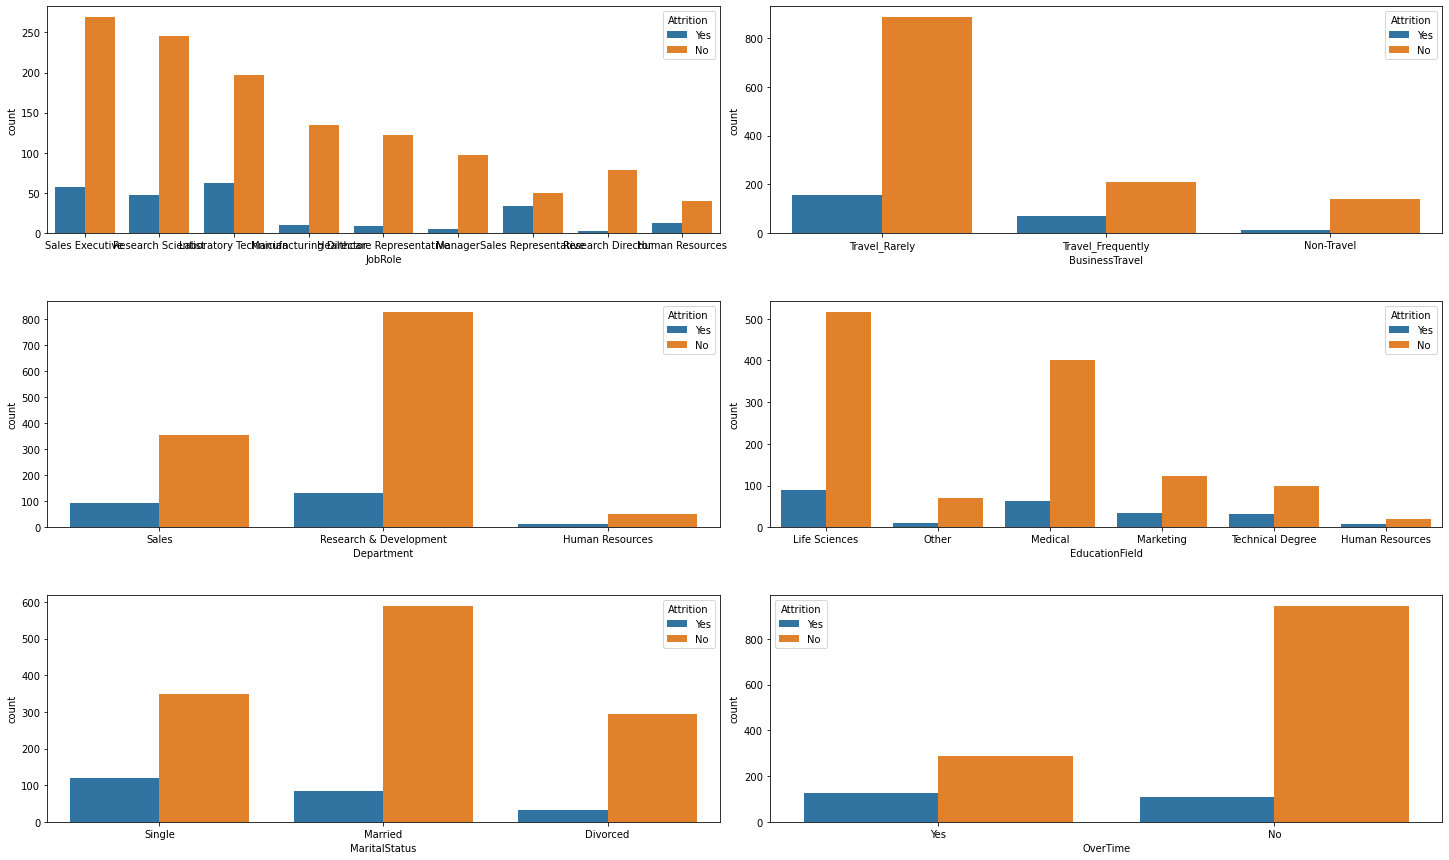

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(25, 15))
sns.countplot(x="JobRole", hue="Attrition", data = labelled_data, ax=axes[0, 0])
sns.countplot(x="BusinessTravel", hue="Attrition", data = labelled_data, ax=axes[0, 1])
sns.countplot(x="Department", hue="Attrition", data = labelled_data, ax=axes[1, 0])
sns.countplot(x="EducationField", hue="Attrition", data = labelled_data, ax=axes[1, 1])
sns.countplot(x="MaritalStatus", hue="Attrition", data = labelled_data, ax=axes[2, 0])
sns.countplot(x="OverTime", hue="Attrition", data = labelled_data, ax=axes[2, 1])
plt.subplots_adjust(hspace=0.3, wspace=0.075)

Mostly people who reported attrition travel rarely, are in R&D, Life Sciences, Male and/or Technicans. Lets see how many much of an intersection exists.

In [11]:
labelled_data_attrit[(labelled_data_attrit['BusinessTravel'] == 'Travel_Rarely') &
                     (labelled_data_attrit['Department'] == 'Research & Development') &
                     (labelled_data_attrit['EducationField'] == 'Life Sciences') &
                     (labelled_data_attrit['Gender'] == 'Male') &
                     (labelled_data_attrit['JobRole'] == 'Laboratory Technician') &
                     (labelled_data_attrit['MaritalStatus'] == 'Single') &
                     (labelled_data_attrit['OverTime'] == 'Yes')]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
EmployeeNumber,,,,,,,
19,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Yes
64,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Yes
331,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Yes
911,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Yes
1649,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Yes


Now to double check, lets see this same group for the non-attrited

In [12]:
labelled_data_nonattrit = labelled_data[labelled_data['Attrition']=='No']
labelled_data_nonattrit = labelled_data_nonattrit.drop('Attrition', axis=1)
labelled_data_nonattrit[(labelled_data_nonattrit['BusinessTravel'] == 'Travel_Rarely') & 
                     (labelled_data_nonattrit['Department'] == 'Research & Development') &
                     (labelled_data_nonattrit['EducationField'] == 'Life Sciences') &
                     (labelled_data_nonattrit['Gender'] == 'Male') &
                     (labelled_data_nonattrit['JobRole'] == 'Laboratory Technician') & 
                     (labelled_data_nonattrit['MaritalStatus'] == 'Single') &
                     (labelled_data_nonattrit['OverTime'] == 'Yes')]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
EmployeeNumber,,,,,,,


It looks like this group of sigle male lab technicians in the life sciences who work overtime and rarely travel are very likely to report yes to attrtion.

Something else interesting to look at might be a few boxplots for the numeric data.

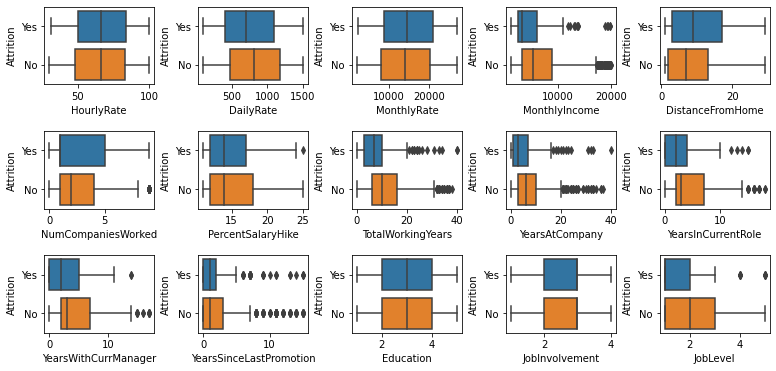

In [13]:
box_features = data[['HourlyRate', 'DailyRate', 'MonthlyRate', 'MonthlyIncome',
                    'DistanceFromHome', 'NumCompaniesWorked', 'PercentSalaryHike', 
                    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                    'YearsWithCurrManager', 'YearsSinceLastPromotion', 'Education', 
                     'JobInvolvement', 'JobLevel', 'Attrition']]
num_rows = 3
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 6))
k = 0
for i in range(num_rows):
    for j in range (num_cols):
        sns.boxplot(ax=axes[i, j], data=box_features, x=box_features.iloc[:, k], y='Attrition')
        k+=1     
plt.subplots_adjust(hspace=0.6, wspace=0.4)

From the box plots, `Education`, `JobInvolvement`, `HourlyRate`, `DailyRate` and `MonthlyRate` are all roughly the same range and IQR regardless of an employee reported 'yes' to attrition or not. This is probably a good sign to drop these features since these also had little correlation with `Attrition`.

A few other observations are that `MonthlyIncome` , `Total Working Years`, and `YearsInCurrentRole` have very different spreads when it comes to `Attrition`. These may be important features to consider when modelling.

#### Feature Selection

It makes senses to drop some of the features that have no correlation to any of the others.

In [14]:
dropped_features = ['JobInvolvement',
                    'Education', 
                    'RelationshipSatisfaction',
                    'WorkLifeBalance',
                    'MonthlyRate',
                    'DailyRate',
                    'HourlyRate']
data_select_features = data.drop(dropped_features,  axis=1)

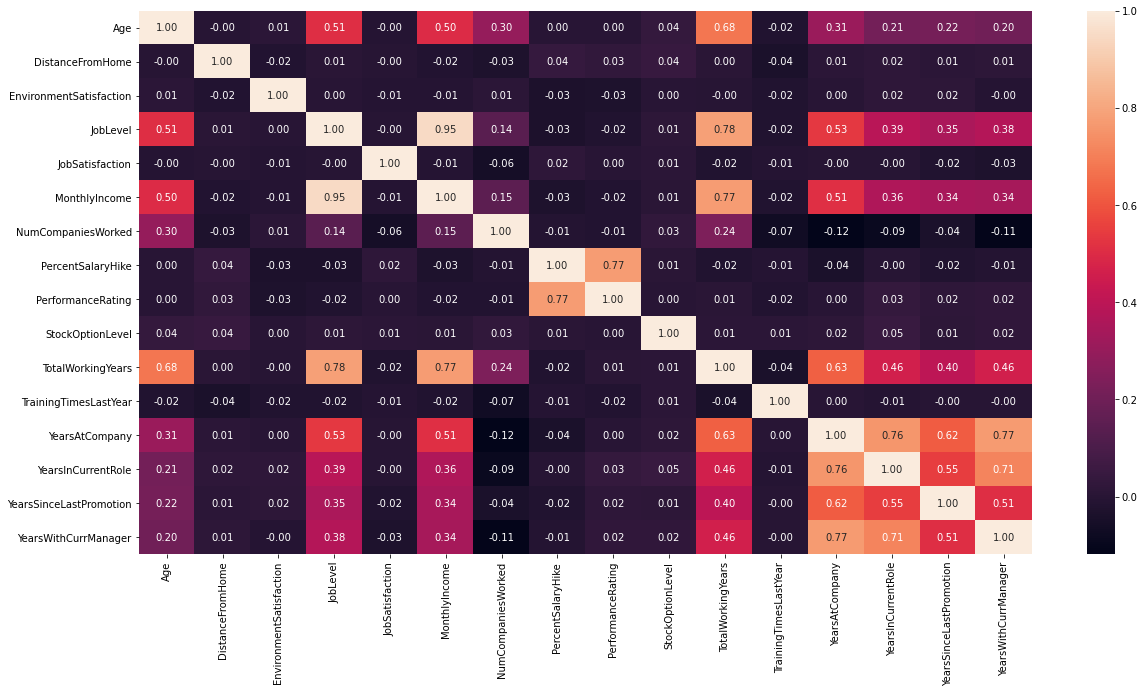

In [15]:
plt.subplots(figsize=(20, 10))
sns.heatmap(data_select_features.corr(), annot=True, fmt='.2f')
plt.show()

This heatmap is a bit cleaner now that some of the features with 0 correlations have been removed.

#### Save data

In [16]:
# save the data to a new csv file
datapath = '../data'
save_file(data_select_features, 'data_select_features_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/data_select_features_data.csv"
